In [ ]:
# 

In [1]:
import pandas as pd
import numpy as np

ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Explore Data

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [8]:
ratings["rating"].value_counts()

4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

In [9]:
# checking for null values in rating data
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
# checking for null values in movie data
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
ratings["rating"].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<AxesSubplot:>

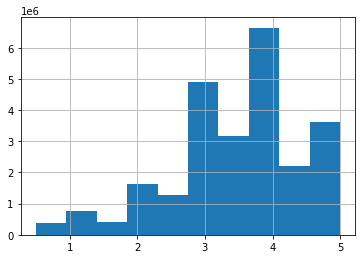

In [13]:
import matplotlib.pyplot as plt
ratings["rating"].hist()

In [15]:
# get the number of ratings given by each user
ratings.userId.value_counts()

72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
21443        20
45297        20
82652        20
30764        20
20369        20
Name: userId, Length: 162541, dtype: int64

# Join the datasets

In [17]:
# movies with a rating in the rating dataset will be joined to the ratings dataset
movies_rating = (ratings.set_index("movieId").join(movies.set_index("movieId"), how = "left"))

movies_rating.head()

,userId,rating,timestamp,title,genres
movieId,,,,,
1,2,3.5,1141415820,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,3,4.0,1439472215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,4,3.0,1573944252,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,4.0,858625949,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,8,4.0,890492517,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
# seperate the genres as their own columns and drop unwanted columns
dummies = movies_rating["genres"].str.get_dummies()
dummies.head()



In [ ]:
clean_movie_ratings = (pd.concat([movies_rating, dummies], axis = 1).drop(["timestamp", "genres"], axis = 1))

clean_movie_ratings.head()

# Split your dataset between features and target

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)